# ISL to text/speech 

In [1]:
import cv2
import mediapipe as mp
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image , model):
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    image.flags.writeable= False 
    results= model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image , cv2.COLOR_RGB2BGR)
    return image , results

In [4]:
def medipipe_landmarks(image , results):
    mp_drawing.draw_landmarks(image, results.face_landmarks , mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image , results.pose_landmarks , mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks , mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks , mp_holistic.HAND_CONNECTIONS) 
    
    

In [5]:
def draw_styled_landmarks(image , results):
    mp_drawing.draw_landmarks(image, results.face_landmarks , mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(200,22,76), thickness=2, circle_radius=1), #for landmarks
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=3, circle_radius=2)) #for connections)
    mp_drawing.draw_landmarks(image , results.pose_landmarks , mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(200,22,76), thickness=2, circle_radius=1), #for landmarks
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=3, circle_radius=2)) #for connections))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks , mp_holistic.HAND_CONNECTIONS,  
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=2), #for landmarks
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=3, circle_radius=2)) #for connections)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks , mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), #for landmarks
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=3, circle_radius=2)) #for connections)

In [6]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [124]:
cap = cv2.VideoCapture(1) 
with mp_holistic.Holistic(min_detection_confidence=0.5 , min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret , frame= cap.read() 
        
        image , results= mediapipe_detection(frame , holistic)
        print(results)

        draw_styled_landmarks(frame , results) 
        

        cv2.imshow('OpenCV feed' , frame)

        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break 
    cap.release() 
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [20]:
len(results.left_hand_landmarks.landmark)

21

In [21]:
len(results.right_hand_landmarks.landmark)

21

In [22]:
len(results.pose_landmarks.landmark)

33

In [23]:
len(results.face_landmarks.landmark)

468

In [24]:
draw_styled_landmarks(frame , results)

<Figure size 700x400 with 0 Axes>

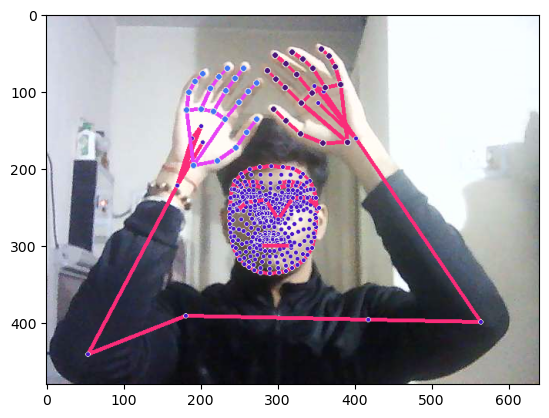

<Figure size 700x400 with 0 Axes>

In [25]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))
plt.figure(figsize=(7,4))

## Extracted the keypoints

In [26]:
frame

array([[[224, 211, 207],
        [223, 209, 206],
        [223, 209, 207],
        ...,
        [251, 244, 237],
        [251, 244, 237],
        [251, 244, 237]],

       [[224, 211, 207],
        [224, 210, 207],
        [223, 209, 207],
        ...,
        [252, 245, 238],
        [252, 245, 238],
        [252, 245, 238]],

       [[224, 210, 207],
        [224, 210, 207],
        [224, 210, 207],
        ...,
        [252, 245, 238],
        [252, 245, 238],
        [252, 245, 238]],

       ...,

       [[175, 149, 149],
        [172, 147, 147],
        [169, 144, 144],
        ...,
        [118, 131, 139],
        [118, 131, 139],
        [117, 131, 139]],

       [[173, 148, 148],
        [170, 145, 145],
        [168, 143, 143],
        ...,
        [112, 130, 137],
        [114, 132, 139],
        [115, 133, 140]],

       [[162, 137, 137],
        [159, 134, 134],
        [157, 132, 132],
        ...,
        [113, 133, 140],
        [117, 137, 144],
        [120, 140, 147]]

In [27]:
import numpy as np 

In [28]:
pose=np.array([[res.x,res.y,res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

pose = np.array([[res.x , res.y , res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)


In [29]:
pose

array([ 0.47059545,  0.55485988, -0.52274191,  0.50109446,  0.49739695,
       -0.43877816,  0.51659125,  0.49701646, -0.4384338 ,  0.53080404,
        0.49718657, -0.4377133 ,  0.4456335 ,  0.50287181, -0.42048049,
        0.42483979,  0.5061844 , -0.4198482 ,  0.4063254 ,  0.50925952,
       -0.42022023,  0.5543741 ,  0.52484822, -0.07784497,  0.38883752,
        0.52958345,  0.03899717,  0.49761611,  0.62605298, -0.40365475,
        0.43390998,  0.62590706, -0.37225729,  0.65331209,  0.8252784 ,
       -0.02482898,  0.28405747,  0.81480944,  0.11099789,  0.88160694,
        0.83130419, -0.6265412 ,  0.08567236,  0.91980547, -0.49930948,
        0.6287297 ,  0.33668709, -0.87342566,  0.26650411,  0.46258813,
       -0.98656863,  0.56278503,  0.20957266, -0.97328413,  0.29644459,
        0.33606431, -1.1315968 ,  0.54425478,  0.19489136, -0.81105691,
        0.31470519,  0.30235803, -0.96319228,  0.55256569,  0.24096486,
       -0.83097315,  0.31827471,  0.34697387, -0.95691335,  0.60

In [30]:
results.pose_landmarks

landmark {
  x: 0.470595449
  y: 0.554859877
  z: -0.522741914
  visibility: 0.999984682
}
landmark {
  x: 0.50109446
  y: 0.497396946
  z: -0.438778162
  visibility: 0.999966562
}
landmark {
  x: 0.516591251
  y: 0.49701646
  z: -0.438433796
  visibility: 0.999962
}
landmark {
  x: 0.530804038
  y: 0.497186571
  z: -0.437713295
  visibility: 0.99996376
}
landmark {
  x: 0.445633501
  y: 0.502871811
  z: -0.42048049
  visibility: 0.999963582
}
landmark {
  x: 0.424839795
  y: 0.506184399
  z: -0.419848204
  visibility: 0.999955595
}
landmark {
  x: 0.4063254
  y: 0.509259522
  z: -0.420220226
  visibility: 0.999963939
}
landmark {
  x: 0.554374099
  y: 0.524848223
  z: -0.0778449699
  visibility: 0.999975383
}
landmark {
  x: 0.388837516
  y: 0.529583454
  z: 0.0389971696
  visibility: 0.999974608
}
landmark {
  x: 0.497616112
  y: 0.626053
  z: -0.403654754
  visibility: 0.999926686
}
landmark {
  x: 0.433909982
  y: 0.625907063
  z: -0.372257292
  visibility: 0.999932528
}
landmark {

In [31]:
results.face_landmarks

landmark {
  x: 0.45258528
  y: 0.591259599
  z: -0.0292532872
}
landmark {
  x: 0.451149672
  y: 0.549327
  z: -0.0396882556
}
landmark {
  x: 0.45245558
  y: 0.566093385
  z: -0.0240998324
}
landmark {
  x: 0.446298242
  y: 0.516402721
  z: -0.0238284543
}
landmark {
  x: 0.451123029
  y: 0.537532151
  z: -0.0407145806
}
landmark {
  x: 0.451714486
  y: 0.524259
  z: -0.0356096737
}
landmark {
  x: 0.453890264
  y: 0.495222241
  z: -0.00971786
}
landmark {
  x: 0.402794182
  y: 0.50394237
  z: 0.0231124498
}
landmark {
  x: 0.45486784
  y: 0.472497344
  z: -0.000876493927
}
landmark {
  x: 0.455227584
  y: 0.45792231
  z: 0.000268862728
}
landmark {
  x: 0.456335545
  y: 0.412033916
  z: 0.0182786509
}
landmark {
  x: 0.452651739
  y: 0.596851349
  z: -0.0291296709
}
landmark {
  x: 0.452937156
  y: 0.601983309
  z: -0.0271153953
}
landmark {
  x: 0.453337073
  y: 0.604832411
  z: -0.0241955761
}
landmark {
  x: 0.453683674
  y: 0.609601617
  z: -0.0243921801
}
landmark {
  x: 0.4536

In [32]:
results.right_hand_landmarks

landmark {
  x: 0.299983144
  y: 0.409832299
  z: 3.64402183e-007
}
landmark {
  x: 0.348220527
  y: 0.397121429
  z: -0.0153308576
}
landmark {
  x: 0.385716915
  y: 0.360615849
  z: -0.0207203105
}
landmark {
  x: 0.407587916
  y: 0.32000792
  z: -0.0256730542
}
landmark {
  x: 0.427277863
  y: 0.285284311
  z: -0.0305758473
}
landmark {
  x: 0.363490522
  y: 0.283435345
  z: -0.00460238522
}
landmark {
  x: 0.391655385
  y: 0.238656625
  z: -0.0183217786
}
landmark {
  x: 0.410781384
  y: 0.210007608
  z: -0.030576596
}
landmark {
  x: 0.427848101
  y: 0.186099291
  z: -0.0384769067
}
landmark {
  x: 0.340419233
  y: 0.264220506
  z: -0.005827785
}
landmark {
  x: 0.364791363
  y: 0.207646906
  z: -0.016993288
}
landmark {
  x: 0.383338839
  y: 0.173324987
  z: -0.0271597262
}
landmark {
  x: 0.400945514
  y: 0.146075964
  z: -0.0341222361
}
landmark {
  x: 0.314607084
  y: 0.256605506
  z: -0.0101821329
}
landmark {
  x: 0.333078
  y: 0.20036605
  z: -0.0221975818
}
landmark {
  x:

In [33]:
results.left_hand_landmarks

landmark {
  x: 0.611249089
  y: 0.346646905
  z: 1.02817786e-007
}
landmark {
  x: 0.562006652
  y: 0.347976565
  z: -0.0129324561
}
landmark {
  x: 0.515814602
  y: 0.324777275
  z: -0.0184085034
}
landmark {
  x: 0.486560524
  y: 0.288399637
  z: -0.0238244217
}
landmark {
  x: 0.46095109
  y: 0.257558733
  z: -0.0285671
}
landmark {
  x: 0.517440259
  y: 0.241106078
  z: -0.00246652379
}
landmark {
  x: 0.485713422
  y: 0.199617371
  z: -0.0138997193
}
landmark {
  x: 0.466110766
  y: 0.175207227
  z: -0.0246529672
}
landmark {
  x: 0.448826015
  y: 0.152935982
  z: -0.0329967812
}
landmark {
  x: 0.540157557
  y: 0.214182407
  z: -0.00542387692
}
landmark {
  x: 0.508954763
  y: 0.163909435
  z: -0.0157145746
}
landmark {
  x: 0.486340344
  y: 0.135372937
  z: -0.0265016221
}
landmark {
  x: 0.464379907
  y: 0.112366609
  z: -0.0348479152
}
landmark {
  x: 0.566571772
  y: 0.198605075
  z: -0.011342505
}
landmark {
  x: 0.541980743
  y: 0.147352025
  z: -0.0238481574
}
landmark {


In [34]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,lh,rh,face])

In [35]:
result_test=extract_keypoints(results).shape

In [36]:
result_test

(1662,)

In [37]:
extract_keypoints(results)[:10]  


array([ 0.47059545,  0.55485988, -0.52274191,  0.99998468,  0.50109446,
        0.49739695, -0.43877816,  0.99996656,  0.51659125,  0.49701646])

In [38]:
np.save('1', result_test)

In [39]:
np.load('1.NPY')

array([1662])

## Real time data collection:

In [40]:
import os

In [41]:
Data_Path= os.path.join('ISL_DATAA')

actions= np.array(['A' , 'B', 'C'])

no_sequences = 30

sequence_length=30

In [42]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(Data_Path, action, str(sequence)))
        except:
            pass

In [43]:
cap = cv2.VideoCapture(1) 
with mp_holistic.Holistic(min_detection_confidence=0.5 , min_tracking_confidence=0.5) as holistic:
    for action in actions:

        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                ret , frame= cap.read() 
                
                image , results= mediapipe_detection(frame , holistic)
        
                draw_styled_landmarks(frame , results) 

                if frame_num==0:
                    cv2.putText(frame , 'STARTING COLLECTION' , (120, 200), cv2.FONT_HERSHEY_SIMPLEX,
                               1, (0,255,0), 4 , cv2.LINE_AA)
                    cv2.putText(frame, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(frame, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(Data_Path, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)


        
                if cv2.waitKey(1) & 0xFF == ord('q'): 
                    break 
    cap.release() 
    cv2.destroyAllWindows()

C:\Users\Aditya\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


## Preprocessing the data - Create the labels and features

In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [45]:
label_map = {label:num for num , label in enumerate(actions)}

In [46]:
label_map

{'A': 0, 'B': 1, 'C': 2}

In [47]:
sequences , labels= [], [] 
for action in actions:
    for sequence in range(no_sequences):
        window=[] 
        for frame_num in range(sequence_length):
            res= np.load(os.path.join(Data_Path , action ,str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
            


In [48]:
x=np.array(sequences)
x.shape

(90, 30, 1662)

In [50]:
np.array(labels).shape

(90,)

In [51]:
y=to_categorical(labels).astype(int)

In [52]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
y.shape

In [53]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.05)

In [54]:
x_train.shape

(85, 30, 1662)

In [55]:
x_test.shape

(5, 30, 1662)

In [56]:
y_train.shape

(85, 3)

In [57]:
y_test.shape

(5, 3)

## Build and train LSTM network

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from tensorflow.keras.callbacks import TensorBoard

In [74]:
log_dir=os.path.join('Logs')
tb_callbacks= TensorBoard(log_dir=log_dir)

In [75]:
model=Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))



C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'] )

In [79]:
model.fit(x_train , y_train , epochs=80, callbacks=[tb_callbacks])

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - categorical_accuracy: 0.5245 - loss: 0.9168
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - categorical_accuracy: 0.6674 - loss: 0.7033
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - categorical_accuracy: 0.7730 - loss: 0.5818
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - categorical_accuracy: 0.8220 - loss: 0.5133
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - categorical_accuracy: 0.9119 - loss: 0.4230
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - categorical_accuracy: 0.7946 - loss: 0.4861
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - categorical_accuracy: 0.8963 - loss: 0.3453
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - categorical_accuracy: 0.7750 - loss: 0.4996
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - categorical_accuracy: 0.7925 - loss: 0.5976
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - categorical_accuracy: 0.8747 - loss: 0.3888
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s

In [80]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,843 (7.82 MB)

 Trainable params: 682,947 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,365,896 (5.21 MB)

In [81]:
pr=model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


In [82]:
actions[np.argmax(pr[0])]

'A'

In [83]:
actions[np.argmax(y_test[0])]

'A'

In [84]:
actions[np.argmax(pr[1])] , actions[np.argmax(y_test[1])]

('C', 'C')

In [85]:
actions[np.argmax(pr[4])] , actions[np.argmax(y_test[4])]

('C', 'C')

In [86]:
actions[np.argmax(pr[3])] , actions[np.argmax(y_test[3])]

('A', 'B')

In [87]:
actions[np.argmax(pr[2])] , actions[np.argmax(y_test[2])]

('C', 'C')

In [89]:
actions[np.argmax(pr[1])] , actions[np.argmax(y_test[1])]

('C', 'C')

In [90]:
actions[np.argmax(pr[0])] , actions[np.argmax(y_test[0])]

('A', 'A')

In [91]:
actions[np.argmax(pr[3])] , actions[np.argmax(y_test[3])]

('A', 'B')

## Save Model

In [92]:
model.save('actions.h5')

## Confusion Matrix

In [93]:
from sklearn.metrics import confusion_matrix , multilabel_confusion_matrix , accuracy_score

In [94]:
yhat=model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [95]:
y_true= np.argmax(y_test , axis=1).tolist()
yhat = np.argmax(yhat , axis=1).tolist()

In [96]:
y_true , yhat

([0, 2, 2, 1, 2], [0, 2, 2, 0, 2])

In [97]:
multilabel_confusion_matrix(y_true , yhat)

array([[[3, 1],
        [0, 1]],

       [[4, 0],
        [1, 0]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [98]:
accuracy_score(y_true , yhat)*100

80.0

In [99]:
#form examining the training model:
yhat=model.predict(x_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [100]:
y_true= np.argmax(y_train , axis=1).tolist()
yhat = np.argmax(yhat , axis=1).tolist()

In [101]:
multilabel_confusion_matrix(y_true , yhat)

array([[[56,  0],
        [ 0, 29]],

       [[56,  0],
        [ 0, 29]],

       [[58,  0],
        [ 0, 27]]], dtype=int64)

In [102]:
accuracy_score(y_true , yhat)*100

100.0

## Real Time detection

In [123]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.3

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(frame, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)           #extraction
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
                 
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):        #for the hold between actions 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
           
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)           #for the ouput in categorical format
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti